# Dividend ETFs efficient portfolios

## Closing price without dividends

In [1]:
import numpy as np
np.set_printoptions(suppress=True)

import datetime as dt
from pandas_datareader import data as pdr
import pandas as pd
# pd.options.display.float_format = '{:.2f}'.format

import yfinance as yf
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import scipy as stats
from scipy import optimize
import plotly.graph_objects as go


In [2]:
# Import data
def getData(stocks, start, end):
    stockData = pdr.get_data_yahoo(stocks, start=start, end=end)
    stockData = stockData['Close']

    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix, stockData

## List of etfs 

In [3]:
stock_list = ["VIG","SCHD", "DGRO","FVD","SDIV" ,"AMLP","VNQ", "VTEB","PZA", "BOND", "ISTB", "SFHIX","ANGL","BNDX","ESFIX", "FTEC","FHLC","FUTY", "FENY", "FNCL", "FSTA", "FDIS","FCOM"]
end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days = 3650)

In [4]:
mean_returns, cov_matrix, stocks_df = getData(stock_list, start_date, end_date)

In [5]:
mean_returns

Symbols
VIG      0.000417
SCHD     0.000433
DGRO     0.000386
FVD      0.000369
SDIV    -0.000340
AMLP    -0.000084
VNQ      0.000179
VTEB    -0.000023
PZA     -0.000059
BOND    -0.000082
ISTB    -0.000034
SFHIX   -0.000054
ANGL     0.000016
BNDX    -0.000017
ESFIX   -0.000399
FTEC     0.000704
FHLC     0.000464
FUTY     0.000310
FENY     0.000182
FNCL     0.000390
FSTA     0.000286
FDIS     0.000481
FCOM     0.000184
dtype: float64

In [6]:
 cov_matrix

Symbols,VIG,SCHD,DGRO,FVD,SDIV,AMLP,VNQ,VTEB,PZA,BOND,ISTB,SFHIX,ANGL,BNDX,ESFIX,FTEC,FHLC,FUTY,FENY,FNCL,FSTA,FDIS,FCOM
Symbols,,,,,,,,,,,,,,,,,,,,,,,
VIG,0.000100,0.000098,0.000113,0.000091,0.000086,0.000091,0.000095,0.000007,0.000005,2.381692e-06,1.853708e-06,1.117134e-05,0.000034,2.211904e-06,0.000013,0.000127,0.000097,0.000083,1.205678e-04,1.231054e-04,0.000081,0.000113,0.000099
SCHD,0.000098,0.000106,0.000116,0.000094,0.000090,0.000106,0.000094,0.000008,0.000005,1.896962e-06,1.559572e-06,1.176688e-05,0.000035,1.374732e-06,0.000014,0.000120,0.000094,0.000084,1.424229e-04,1.302315e-04,0.000083,0.000108,0.000098
DGRO,0.000113,0.000116,0.000123,0.000108,0.000105,0.000123,0.000111,0.000008,0.000006,2.702411e-06,2.009625e-06,1.247121e-05,0.000043,2.022058e-06,0.000015,0.000138,0.000106,0.000092,1.485699e-04,1.449218e-04,0.000087,0.000122,0.000109
FVD,0.000091,0.000094,0.000108,0.000093,0.000089,0.000096,0.000099,0.000009,0.000007,3.272946e-06,2.309139e-06,1.190065e-05,0.000033,3.007001e-06,0.000014,0.000106,0.000087,0.000094,1.254977e-04,1.209706e-04,0.000078,0.000098,0.000090
SDIV,0.000086,0.000090,0.000105,0.000089,0.000137,0.000143,0.000106,0.000014,0.000013,6.749164e-06,4.011882e-06,1.749981e-05,0.000045,4.205301e-06,0.000026,0.000112,0.000082,0.000077,1.620394e-04,1.276655e-04,0.000067,0.000110,0.000100
AMLP,0.000091,0.000106,0.000123,0.000096,0.000143,0.000365,0.000106,0.000008,0.000007,4.848736e-06,2.752078e-06,2.001145e-05,0.000056,1.988779e-06,0.000034,0.000121,0.000091,0.000070,2.900877e-04,1.570732e-04,0.000065,0.000123,0.000111
VNQ,0.000095,0.000094,0.000111,0.000099,0.000106,0.000106,0.000157,0.000015,0.000015,9.185984e-06,4.657440e-06,1.493864e-05,0.000041,7.582792e-06,0.000017,0.000114,0.000091,0.000114,1.201875e-04,1.225655e-04,0.000084,0.000109,0.000101
VTEB,0.000007,0.000008,0.000008,0.000009,0.000014,0.000008,0.000015,0.000012,0.000013,6.680014e-06,2.928034e-06,3.742503e-06,0.000011,3.908081e-06,0.000003,0.000009,0.000006,0.000013,8.339443e-06,7.548175e-06,0.000008,0.000009,0.000007
PZA,0.000005,0.000005,0.000006,0.000007,0.000013,0.000007,0.000015,0.000013,0.000018,6.362622e-06,2.793492e-06,4.387990e-06,0.000010,4.321495e-06,0.000005,0.000006,0.000005,0.000012,7.377908e-06,5.254214e-06,0.000005,0.000007,0.000005


In [7]:
# generating multiple portfolios with different weights
def generate_portfolios(num_portfolios,mean_returns,cov_matrix,risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for portfolio in range(num_portfolios):
        weights = np.random.random(len(cov_matrix.index))
        weights /= np.sum(weights)
        weights_record.append(weights)
        returns, volatility = portfolio_performance(weights,mean_returns,cov_matrix)
        results[0,portfolio] = volatility
        results[1,portfolio] = returns
        results[2,portfolio] = (returns - risk_free_rate) / volatility
    return results, weights_record

In [8]:
# annual portfolio perfomance 
def portfolio_performance(weights,mean_returns,cov_matrix):
    returns = np.sum(weights*mean_returns) * 253
    variance = np.dot(weights.T,np.dot(cov_matrix,weights))
    volatility = np.sqrt(variance) * np.sqrt(253)
    return returns, volatility

In [9]:
# efficient fronteer chart
def display_random_efficient_frontier(mean_returns,cov_matrix,num_portfolios,risk_free_rate):
    results, weights = generate_portfolios(num_portfolios,mean_returns,cov_matrix,risk_free_rate)

    max_sharpe_index = np.argmax(results[2])
    max_volatility = results[0,max_sharpe_index]
    max_return = results[1,max_sharpe_index]
    max_sharpe_allocations = allocations(max_sharpe_index,weights,stocks_df).T

    print("MAX SHARPE RATIO\n")
    print("Return: {0:.2f}".format(max_return))
    print("Volatility: {0:.2f}".format(max_volatility))
    print(max_sharpe_allocations)

    min_vol_index = np.argmin(results[0])
    min_volatility = results[0,min_vol_index]
    min_return = results[1,min_vol_index]
    min_vol_allocations = allocations(min_vol_index,weights,stocks_df).T

    print("\nMINIMUM VOLATILITY\n")
    print("Return: {0:.2f}".format(min_return))
    print("Volatility: {0:.2f}".format(min_volatility))
    print(min_vol_allocations)

    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(max_volatility,max_return,marker='X',color='r',s=400, label='Maximum Sharpe ratio')
    plt.scatter(min_volatility,min_return,marker='X',color='y',s=400, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('Volatility')
    plt.ylabel('Returns')
    plt.legend(labelspacing=0.8)

def allocations(index,weights,stocks_df):
    allocation = pd.DataFrame(weights[index],index=stocks_df.columns,columns=['allocation'])
    return allocation

MAX SHARPE RATIO

Return: 0.07
Volatility: 0.13
Symbols          VIG      SCHD      DGRO       FVD      SDIV      AMLP  \
allocation  0.085257  0.084079  0.023734  0.063171  0.002154  0.009803   

Symbols          VNQ      VTEB       PZA     BOND     ISTB     SFHIX  \
allocation  0.006263  0.023363  0.067692  0.06597  0.00984  0.084417   

Symbols         ANGL      BNDX     ESFIX      FTEC      FHLC     FUTY  \
allocation  0.021507  0.010449  0.001334  0.083275  0.073393  0.01277   

Symbols         FENY      FNCL      FSTA     FDIS      FCOM  
allocation  0.017482  0.077696  0.048237  0.07559  0.052524  

MINIMUM VOLATILITY

Return: 0.01
Volatility: 0.08
Symbols          VIG      SCHD      DGRO       FVD      SDIV      AMLP  \
allocation  0.011474  0.059865  0.010283  0.014336  0.004441  0.057516   

Symbols         VNQ      VTEB       PZA      BOND      ISTB     SFHIX  \
allocation  0.00699  0.109845  0.053481  0.083271  0.058818  0.032988   

Symbols        ANGL    BNDX     ESFIX   

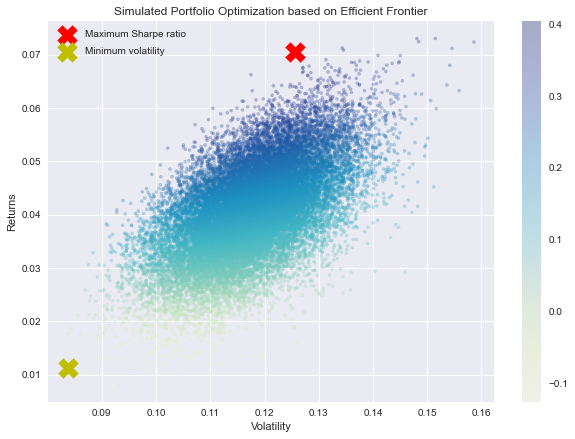

In [10]:
returns = stocks_df.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 25000
risk_free_rate = 0.01977

display_random_efficient_frontier(mean_returns,cov_matrix,num_portfolios,risk_free_rate)